In [1]:
from collections import defaultdict
import pandas as pd
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from data import data_manager
from config.config_manager import _C as cfg
from tools.logger import setup_logger
logger = setup_logger(".")
cfg.merge_from_file("../reid.yml")

In [3]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/PAR"
cfg.DATASET.NAME = 'par'
par_dataset = data_manager.init_img_dataset(cfg)

2019-08-24 23:25:10,684 logger INFO: => ImageNet loaded
2019-08-24 23:25:11,112 logger INFO: Dataset statistics:
2019-08-24 23:25:11,114 logger INFO:   ------------------------------
2019-08-24 23:25:11,115 logger INFO:   subset   | # class | # images
2019-08-24 23:25:11,117 logger INFO:   ------------------------------
2019-08-24 23:25:11,118 logger INFO:   train    |      13 |   185887
2019-08-24 23:25:11,119 logger INFO:   val      |      13 |    94335
2019-08-24 23:25:11,124 logger INFO:   ------------------------------


In [2]:
cfg.DATASET.TRAIN_PATH = "/home/allen/Downloads/reid/"
cfg.DATASET.NAME = 'cuhk03'
cuhk_dataset = data_manager.init_img_dataset(cfg)

2019-07-30 14:48:15,746 logger INFO: Note: if root path is changed, the previously generated json files need to be re-generated (delete them first)
2019-07-30 14:48:15,794 logger INFO: Split index = 0
2019-07-30 14:48:15,795 logger INFO: => CUHK03 (detected) loaded
2019-07-30 14:48:15,796 logger INFO: Dataset statistics:
2019-07-30 14:48:15,797 logger INFO:   ------------------------------
2019-07-30 14:48:15,797 logger INFO:   subset   | # ids | # images
2019-07-30 14:48:15,799 logger INFO:   ------------------------------
2019-07-30 14:48:15,800 logger INFO:   train    |   767 |     7365
2019-07-30 14:48:15,801 logger INFO:   query    |   700 |     1400
2019-07-30 14:48:15,801 logger INFO:   gallery  |   700 |     5332
2019-07-30 14:48:15,802 logger INFO:   ------------------------------
2019-07-30 14:48:15,803 logger INFO:   total    |  1467 |     8765
2019-07-30 14:48:15,803 logger INFO:   ------------------------------
2019-07-30 14:48:15,810 logger INFO: => cuhk03 cleaned
2019-07

In [2]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"
cfg.DATASET.NAME = 'market1501'
cfg.DATASET.CLEAN = False
market_dataset = data_manager.init_img_dataset(cfg)

2019-08-15 14:45:18,329 logger INFO: => Market1501 loaded
2019-08-15 14:45:18,330 logger INFO: Dataset statistics:
2019-08-15 14:45:18,331 logger INFO:   ------------------------------
2019-08-15 14:45:18,331 logger INFO:   subset   | # ids | # images
2019-08-15 14:45:18,332 logger INFO:   ------------------------------
2019-08-15 14:45:18,332 logger INFO:   train    |   751 |    12936
2019-08-15 14:45:18,333 logger INFO:   query    |   750 |     3368
2019-08-15 14:45:18,333 logger INFO:   gallery  |   751 |    15913
2019-08-15 14:45:18,334 logger INFO:   ------------------------------
2019-08-15 14:45:18,334 logger INFO:   total    |  1501 |    32217
2019-08-15 14:45:18,335 logger INFO:   ------------------------------


In [2]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"
cfg.DATASET.NAME = 'dukemtmcreid'
duke_dataset = data_manager.init_img_dataset(cfg)

2019-08-16 14:55:03,973 logger INFO: => DukeMTMC-reID loaded
2019-08-16 14:55:03,974 logger INFO: Dataset statistics:
2019-08-16 14:55:03,975 logger INFO:   ------------------------------
2019-08-16 14:55:03,976 logger INFO:   subset   | # ids | # images
2019-08-16 14:55:03,977 logger INFO:   ------------------------------
2019-08-16 14:55:03,977 logger INFO:   train    |   702 |    16522
2019-08-16 14:55:03,978 logger INFO:   query    |   702 |     2228
2019-08-16 14:55:03,978 logger INFO:   gallery  |  1110 |    17661
2019-08-16 14:55:03,980 logger INFO:   ------------------------------
2019-08-16 14:55:03,981 logger INFO:   total    |  1404 |    36411
2019-08-16 14:55:03,981 logger INFO:   ------------------------------


In [3]:
from torch.utils import data
from data.build_data import build_reid_atmap_dataset
from data.build_loader import build_reid_loader
from data.build_transform import build_transform
train_trans = build_transform(cfg)
train_dataset = build_reid_atmap_dataset(duke_dataset.train,
                                         cfg,
                                         train_trans)

In [4]:
img, pid, _, at_map, at_map_label = train_dataset[108]

In [5]:
at_map

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 0.])

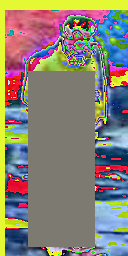

In [7]:
import torchvision.transforms.functional as F
F.to_pil_image(img)

In [8]:
at_map.int().reshape(16,8).float()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
t_loader = data.DataLoader(
            train_dataset, 
            batch_size=cfg.INPUT.SIZE_TRAIN,
            num_workers=1, 
            pin_memory=True
        )

In [7]:
img, pid, _, at_map, at_map_label = next(iter(t_loader))

In [11]:
at_map[1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 1.])

In [15]:
import numpy as np
import torch
a = np.random.randint(128,128)

In [16]:
bce = torch.nn.BCEWithLogitsLoss()

In [22]:
a = torch.rand(64,128)

In [23]:
a.shape

torch.Size([64, 128])

In [25]:
bce(a,at_map)

tensor(0.5988)

In [37]:
_dataset = []
_dataset.extend(cuhk_dataset.train)
_dataset.extend(market_dataset.train)
_dataset.extend(duke_dataset.train)

dataset = []

for i, (a, b, c) in enumerate(_dataset):   
    
    if 'market' in a:
        offset = cuhk_dataset.num_train_pids
        b += offset
    if 'duke' in a:
        offset = cuhk_dataset.num_train_pids + market_dataset.num_train_pids
        b += offset
    dataset.append([a, b, c])
    

In [2]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"
cfg.DATASET.NAME = "msmt17"
msmt_dataset = data_manager.init_img_dataset(cfg)

2019-08-21 17:05:55,755 logger INFO: => MSMT17 loaded
2019-08-21 17:05:55,757 logger INFO: Dataset statistics:
2019-08-21 17:05:55,757 logger INFO:   ------------------------------
2019-08-21 17:05:55,758 logger INFO:   subset   | # ids | # images
2019-08-21 17:05:55,759 logger INFO:   ------------------------------
2019-08-21 17:05:55,759 logger INFO:   train    |  1041 |    32621
2019-08-21 17:05:55,760 logger INFO:   query    |  3060 |    11659
2019-08-21 17:05:55,761 logger INFO:   gallery  |  3060 |    82161
2019-08-21 17:05:55,762 logger INFO:   ------------------------------
2019-08-21 17:05:55,763 logger INFO:   total    |  4101 |   126441
2019-08-21 17:05:55,763 logger INFO:   ------------------------------


In [2]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/MSMT17/"
cfg.DATASET.NAME = "mars"
mars_dataset = data_manager.init_vid_dataset(cfg)

2019-07-31 10:36:10,416 logger INFO: => MARS loaded
2019-07-31 10:36:10,417 logger INFO: Dataset statistics:
2019-07-31 10:36:10,418 logger INFO:   ------------------------------
2019-07-31 10:36:10,418 logger INFO:   subset   | # ids | # tracklets
2019-07-31 10:36:10,419 logger INFO:   ------------------------------
2019-07-31 10:36:10,421 logger INFO:   train    |   625 |     8298
2019-07-31 10:36:10,422 logger INFO:   query    |   626 |     1980
2019-07-31 10:36:10,422 logger INFO:   gallery  |   622 |     9330
2019-07-31 10:36:10,424 logger INFO:   ------------------------------
2019-07-31 10:36:10,424 logger INFO:   total    |  1251 |    19608
2019-07-31 10:36:10,425 logger INFO:   number of images per tracklet: 2 ~ 920, average 59.5
2019-07-31 10:36:10,426 logger INFO:   ------------------------------


In [4]:
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"
cfg.DATASET.NAME = "msmt17_total"
msmt17_total_dataset = data_manager.init_img_dataset(cfg)

2019-07-31 11:36:38,162 logger INFO: => MSMT17 loaded
2019-07-31 11:36:38,163 logger INFO: Dataset statistics:
2019-07-31 11:36:38,164 logger INFO:   ------------------------------
2019-07-31 11:36:38,164 logger INFO:   subset   | # ids | # images
2019-07-31 11:36:38,165 logger INFO:   ------------------------------
2019-07-31 11:36:38,166 logger INFO:   train    |  3060 |   126441
2019-07-31 11:36:38,167 logger INFO:   ------------------------------


In [6]:
msmt17_total_dataset.train[10000]

('/media/allen/mass/reid/msmt17/bounding_box_train/0856_c14_0009.jpg', 856, 0)

In [29]:
target_dataset = market_dataset
stats_dfs = []

datasets = [target_dataset.train, target_dataset.query, target_dataset.gallery]
for dataset in datasets:
    stats = defaultdict(list)
    for path, pid, cid in dataset:
        stats[pid].append(path)
    stats_dfs.append(stats)
#     stats_dfs.append(pd.DataFrame.from_dict(stats, orient='index'))    
    
train_pids = set(stats_dfs[0].keys())
query_pids = set(stats_dfs[1].keys())
gallery_pids = set(stats_dfs[2].keys())

In [35]:
stats_dfs[0][2]

['/media/allen/mass/reid/market1501/bounding_box_train/0010_c6s4_002452_02.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c6s4_002427_07.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c3s3_075919_02.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c3s3_076069_03.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c5s3_076487_02.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c6s4_002427_02.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c6s4_002502_02.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c1s6_027271_05.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c3s3_076019_01.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c1s6_027296_01.jpg',
 '/media/allen/mass/reid/market1501/bounding_box_train/0010_c3s3_076044_05.jpg']

In [31]:
set.intersection(train_pids, query_pids)

{1,
 3,
 4,
 5,
 6,
 8,
 9,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 24,
 25,
 26,
 29,
 31,
 33,
 34,
 36,
 38,
 39,
 40,
 41,
 44,
 45,
 49,
 50,
 51,
 54,
 55,
 58,
 60,
 61,
 62,
 63,
 66,
 71,
 72,
 73,
 74,
 75,
 78,
 80,
 83,
 85,
 87,
 89,
 91,
 92,
 94,
 96,
 101,
 102,
 103,
 109,
 112,
 113,
 119,
 120,
 124,
 126,
 128,
 130,
 131,
 133,
 137,
 138,
 144,
 145,
 146,
 147,
 152,
 153,
 154,
 155,
 156,
 157,
 161,
 163,
 165,
 168,
 170,
 171,
 174,
 182,
 183,
 186,
 187,
 188,
 189,
 191,
 192,
 194,
 196,
 198,
 200,
 203,
 205,
 207,
 210,
 213,
 215,
 217,
 218,
 219,
 220,
 226,
 227,
 228,
 229,
 230,
 231,
 233,
 235,
 238,
 240,
 244,
 246,
 247,
 252,
 253,
 256,
 257,
 258,
 260,
 262,
 263,
 265,
 267,
 270,
 271,
 274,
 275,
 278,
 280,
 283,
 284,
 285,
 286,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 300,
 302,
 304,
 305,
 310,
 311,
 312,
 315,
 316,
 319,
 320,
 322,
 329,
 330,
 334,
 336,
 337,
 342,
 343,
 345,
 346,
 351,
 353,
 355,
 356,
 360,


In [26]:
query_pids - train_pids

{1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1143,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,

In [35]:
stats_dfs[0][5]

[('/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F001.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F002.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F003.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F004.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F005.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F006.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F007.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F008.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F009.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F010.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F011.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F012.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F013.jpg',
  '/media/allen/mass/MARS/mars/bbox_train/0011/0011C5T0002F014.jpg',
  '/media/allen/mass/MARS/mars/bbo

In [50]:
new_query = []
for i, (path, pid, cid) in enumerate(target_dataset.query):
    if pid not in train_pids:
        new_query.append(target_dataset.query[i])
    else:
        
target_dataset.query = new_query

new_gallery = []
for i, (path, pid, cid) in enumerate(target_dataset.gallery):
    if pid not in train_pids:
        new_gallery.append(target_dataset.gallery[i])
target_dataset.gallery = new_gallery

In [51]:
stats_dfs = []

datasets = [target_dataset.train, target_dataset.query, target_dataset.gallery]
for dataset in datasets:
    stats = defaultdict(int)
    for path, pid, cid in dataset:
        stats[pid] += 1

    stats_dfs.append(pd.DataFrame.from_dict(stats, orient='index'))    
    
train_pids = set(stats_dfs[0].index.values)
query_pids = set(stats_dfs[1].index.values)
gallery_pids = set(stats_dfs[2].index.values)

In [52]:
len(gallery_pids)

2019

In [30]:
len(set.union(train_pids, query_pids, gallery_pids))

3060

In [25]:
len(query_pids - train_pids)

2019

In [94]:
for i, (path, pid, cid) in enumerate(target_dataset.query):
    if pid in list(a):
        target_dataset.query.pop(i)

In [5]:
from data.build_loader import build_reid_loader
cfg.DATASET.TRAIN_PATH = "/media/allen/mass/MSMT17/"
cfg.DATASET.NAME = "general"
train_loader, query_loader, gallery_loader = build_reid_loader(cfg)

RuntimeError: '/media/allen/mass/MSMT17/market1501' is not available